# FFT Analysis

Soundfile is being used to read in wav data

In [13]:
import soundfile as sf

## J Dilla Beat
data, samplerate = sf.read('./sample.wav')

## Sin Wave
# data, samplerate = sf.read('./sample2.wav')

## Lets get a meaningful 3 seconds of the clip
data = data[samplerate:samplerate * 4]

In [14]:
samplerate

44100

In [15]:
data

array([[  1.19018555e-03,   1.64794922e-03],
       [  7.01904297e-04,   9.15527344e-04],
       [  6.10351562e-05,   2.13623047e-04],
       ..., 
       [ -1.07421875e-02,  -1.32446289e-02],
       [ -1.11083984e-02,  -1.36718750e-02],
       [ -1.12915039e-02,  -1.40991211e-02]])

We can to transpose the data and combine channels to make it easier to work with

In [16]:
import numpy as np

data = np.transpose(data)
if len(data) == 2:
    data = data[0] + data[1]
data

array([ 0.00283813,  0.00161743,  0.00027466, ..., -0.02398682,
       -0.02478027, -0.02539062])

### Lets plot our audio data

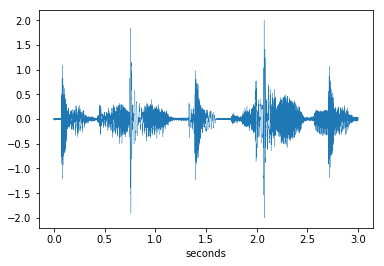

In [17]:
import matplotlib.pyplot as plt

x = np.linspace(0, len(data) / samplerate, len(data))
plt.plot(x, data, linewidth=0.3)
plt.xlabel('seconds')
plt.show()

### Define our parameters

In [18]:
# Number of Samples in each FFT window
N = int(1024)

# Distance the window moves for each FFT
# M = 1 for highest resolution
M = 1

# Interval between samples
T = 1.0 / samplerate


Now, we move the 'FFT Window' through the audio data, appending each FFT to the `fftData` list

In [19]:
import scipy.fftpack

# Samples Offset
offset = int(0)

# List to store FFT Data in
fftData = []

for i in range(0, len(data) - N, M):
    yf = scipy.fftpack.fft(data[i:i + N])
    
    ## Add only first half to fftData
    fftData.append(yf[0:int(N/2)])

# Comes as imaginary pairs
fftData = np.absolute(fftData)

shape = np.shape(fftData)
shape

(131276, 512)

This corresponds to 129 time steps with 512 frequencies each

### Plotting Spectrum Data

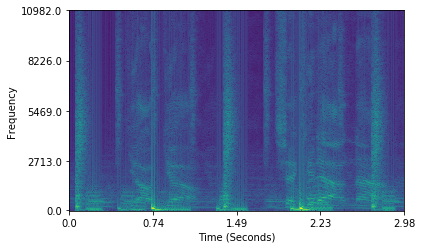

In [20]:
# Number of frequency bins to display
n_freq = int(N/4)

xf = np.round(scipy.fftpack.fftfreq(N, d=T))[:n_freq]

## Make it more visible
spectrum = np.transpose(fftData ** 0.2)[:n_freq]

## Fix Aspect Ratio to be rectangular
aspect = len(fftData) / n_freq * 0.6
plt.imshow(spectrum, interpolation="none", origin='lower', aspect=aspect)

# Create 5 ticks for frequencies
ticks = np.linspace(0, n_freq-1, 5, dtype=int)
ax = plt.gca()
ax.set_yticks(ticks)
ax.set_yticklabels(xf[ticks])
ax.set_ylabel('Frequency')

# Create 5 ticks for time
ticks = np.linspace(0, len(fftData), 5)
ax.set_xticks(ticks)
ax.set_xticklabels(np.round(ticks * M * T, 2))
ax.set_xlabel('Time (Seconds)')

plt.show()

### Compare to the scipy spectrogram function

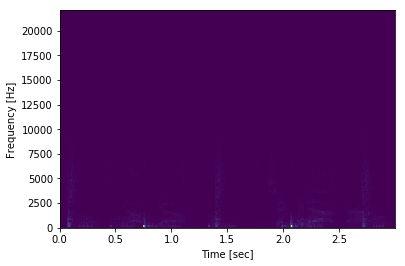

In [21]:
from scipy import signal

f, t, Sxx = signal.spectrogram(data, fs=samplerate, mode='magnitude', scaling='spectrum')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()